# Fee Payment Default Prediction – Exploratory Data Analysis

## Project Overview

This notebook focuses on Exploratory Data Analysis (EDA) for the Fee Payment Default Prediction project.
The goal of this analysis is to understand student fee payment behavior, identify patterns, detect anomalies, and extract insights that will help in building reliable machine learning models.

### Objectives of EDA

- Understand dataset structure and data quality  
- Identify missing values and outliers  
- Analyze fee payment behavior  
- Study relationships between features  
- Identify key predictors for fee default 

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

The dataset is loaded from a CSV file containing student admission and fee payment details.  
Each row represents an individual student record.


In [2]:
file = '../data/Educational_ERP_DataSetxlsx.xlsx'
admissions = pd.read_excel(file, sheet_name="Admissions")
fees = pd.read_excel(file, sheet_name="Fee_Collection")


### Preview of Dataset

Displaying the first few rows to understand the structure, column names, and sample values.


In [3]:
admissions.head()

,student_id,student_name,email,phone,course,admission_date,admission_status
0,STU-1000,Kiran Iyer,kiran.39@mail.com,9428007506,BBA,2024-06-01 00:00:00,Rejected
1,STU-1001,Rohit Reddy,rohit.46@mail.com,9603451987,MBA,2024-06-01 01:00:00,Rejected
2,STU-1002,Emma Taylor,emma.86@mail.com,9246608643,B.Tech,2024-06-01 02:00:00,Waitlisted
3,STU-1003,Vivek Nair,vivek.81@mail.com,9222676340,B.Tech,2024-06-01 03:00:00,Waitlisted
4,STU-1004,Amit Sharma,amit.36@mail.com,9769061232,BBA,2024-06-01 04:00:00,Waitlisted


In [4]:
fees.head()

,student_id,student_name,email,phone,total_fee,paid_fee,Old_payment_status,payment_status
0,STU-1000,Kiran Iyer,kiran.39@mail.com,9428007506,106092,106092,Paid,PAID
1,STU-1001,Rohit Reddy,rohit.46@mail.com,9603451987,72408,72408,Paid,PAID
2,STU-1002,Emma Taylor,emma.86@mail.com,9246608643,155578,155578,Paid,PAID
3,STU-1003,Vivek Nair,vivek.81@mail.com,9222676340,97216,43360,Partially Paid,PENDING
4,STU-1004,Amit Sharma,amit.36@mail.com,9769061232,174295,86980,Pending,PENDING


### Dataset Summary

- The dataset contains both numerical and categorical features  
- Fee-related columns include total fee, paid fee, and balance  
- Target variables indicate delayed payment and reminder requirement  


In [5]:
admissions.info()
print('Shape of Admissions',admissions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   student_id        5000 non-null   object        
 1   student_name      5000 non-null   object        
 2   email             5000 non-null   object        
 3   phone             5000 non-null   int64         
 4   course            5000 non-null   object        
 5   admission_date    5000 non-null   datetime64[ns]
 6   admission_status  5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 273.6+ KB
Shape of Admissions (5000, 7)


In [6]:
fees.info()
print('Shape of Fees Data', fees.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   student_id          5000 non-null   object
 1   student_name        5000 non-null   object
 2   email               5000 non-null   object
 3   phone               5000 non-null   int64 
 4   total_fee           5000 non-null   int64 
 5   paid_fee            5000 non-null   int64 
 6   Old_payment_status  5000 non-null   object
 7   payment_status      5000 non-null   object
dtypes: int64(3), object(5)
memory usage: 312.6+ KB
Shape of Fees Data (5000, 8)


## 4. Check Missing Values

In [7]:
admissions.isnull().sum()

student_id          0
student_name        0
email               0
phone               0
course              0
admission_date      0
admission_status    0
dtype: int64

In [8]:
fees.isnull().sum()

student_id            0
student_name          0
email                 0
phone                 0
total_fee             0
paid_fee              0
Old_payment_status    0
payment_status        0
dtype: int64

## 5. Check Admission to Fee Mapping

In [9]:
merged = admissions.merge(fees, on="student_id", how="left")
merged.head(15)

,student_id,student_name_x,email_x,phone_x,course,admission_date,admission_status,student_name_y,email_y,phone_y,total_fee,paid_fee,Old_payment_status,payment_status
0,STU-1000,Kiran Iyer,kiran.39@mail.com,9428007506,BBA,2024-06-01 00:00:00,Rejected,Kiran Iyer,kiran.39@mail.com,9428007506,106092,106092,Paid,PAID
1,STU-1001,Rohit Reddy,rohit.46@mail.com,9603451987,MBA,2024-06-01 01:00:00,Rejected,Rohit Reddy,rohit.46@mail.com,9603451987,72408,72408,Paid,PAID
2,STU-1002,Emma Taylor,emma.86@mail.com,9246608643,B.Tech,2024-06-01 02:00:00,Waitlisted,Emma Taylor,emma.86@mail.com,9246608643,155578,155578,Paid,PAID
3,STU-1003,Vivek Nair,vivek.81@mail.com,9222676340,B.Tech,2024-06-01 03:00:00,Waitlisted,Vivek Nair,vivek.81@mail.com,9222676340,97216,43360,Partially Paid,PENDING
4,STU-1004,Amit Sharma,amit.36@mail.com,9769061232,BBA,2024-06-01 04:00:00,Waitlisted,Amit Sharma,amit.36@mail.com,9769061232,174295,86980,Pending,PENDING
5,STU-1005,Manish Verma,manish.16@mail.com,9375775418,B.Tech,2024-06-01 05:00:00,Waitlisted,Manish Verma,manish.16@mail.com,9375775418,179434,93158,Partially Paid,PENDING
6,STU-1006,Anita Nair,anita.60@mail.com,9477196624,BCA,2024-06-01 06:00:00,Rejected,Anita Nair,anita.60@mail.com,9477196624,149305,82440,Pending,PENDING
7,STU-1007,Michael Thomas,michael.60@mail.com,9545648337,B.Tech,2024-06-01 07:00:00,Waitlisted,Michael Thomas,michael.60@mail.com,9545648337,166207,166207,Pending,PAID
8,STU-1008,Manish Iyer,manish.75@mail.com,9845381422,MCA,2024-06-01 08:00:00,Waitlisted,Manish Iyer,manish.75@mail.com,9845381422,196568,139594,Partially Paid,PENDING
9,STU-1009,Karthik Das,karthik.73@mail.com,9714821510,B.Tech,2024-06-01 09:00:00,Waitlisted,Karthik Das,karthik.73@mail.com,9714821510,67394,61668,Pending,PENDING


In [10]:
merged = merged.drop(columns=['student_name_y', 'email_y'])


In [11]:
print(merged.columns.tolist())


['student_id', 'student_name_x', 'email_x', 'phone_x', 'course', 'admission_date', 'admission_status', 'phone_y', 'total_fee', 'paid_fee', 'Old_payment_status', 'payment_status']


## 6. Create Target Variable

In [12]:
# Create balance column
merged['balance'] = merged['total_fee'] - merged['paid_fee']#balance = total fee assigned – fee already paid

# Create delayed payment target
merged['delayed_payment'] = (
    (merged['payment_status'].str.lower() == 'pending') &
    (merged['balance'] > 0)
).astype(int)

# Admission Status =1 Not 
#Converts the payment_status text to lowercase Checks if it equals "pending":True(1) → payment pending,False (0)→ payment completed | True → balance is remaining ,False → everything is paid

# Create needs reminder target
merged['needs_reminder'] = ((merged['paid_fee'] / merged['total_fee']) <= 0.7).astype(int)
#Needs Reminder if fees paid are 50% less than  total fees 
#needs reminder =1
# No reminder=0
merged[['student_id', 'total_fee', 'paid_fee', 'payment_status','balance', 'delayed_payment', 'needs_reminder']].head(10)#Selects specific columns for display


,student_id,total_fee,paid_fee,payment_status,balance,delayed_payment,needs_reminder
0,STU-1000,106092,106092,PAID,0,0,0
1,STU-1001,72408,72408,PAID,0,0,0
2,STU-1002,155578,155578,PAID,0,0,0
3,STU-1003,97216,43360,PENDING,53856,1,1
4,STU-1004,174295,86980,PENDING,87315,1,1
5,STU-1005,179434,93158,PENDING,86276,1,1
6,STU-1006,149305,82440,PENDING,66865,1,1
7,STU-1007,166207,166207,PAID,0,0,0
8,STU-1008,196568,139594,PENDING,56974,1,0
9,STU-1009,67394,61668,PENDING,5726,1,0


## 7. Visualizations

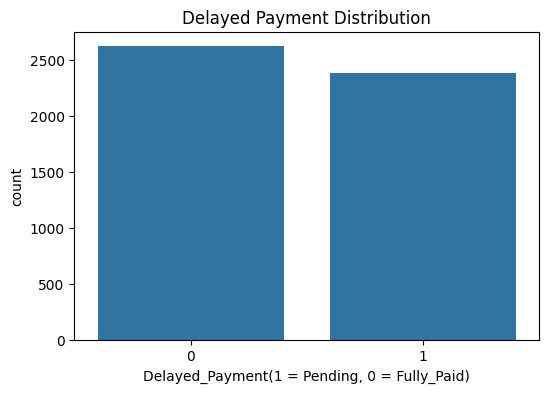

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='delayed_payment', data=merged)
plt.title("Delayed Payment Distribution")
plt.xlabel("Delayed_Payment(1 = Pending, 0 = Fully_Paid)")
plt.show()


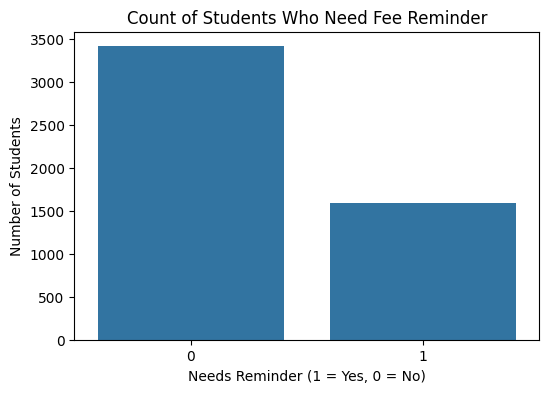

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='needs_reminder', data=merged)
plt.title("Count of Students Who Need Fee Reminder")
plt.xlabel("Needs Reminder (1 = Yes, 0 = No)")
plt.ylabel("Number of Students")
plt.show()

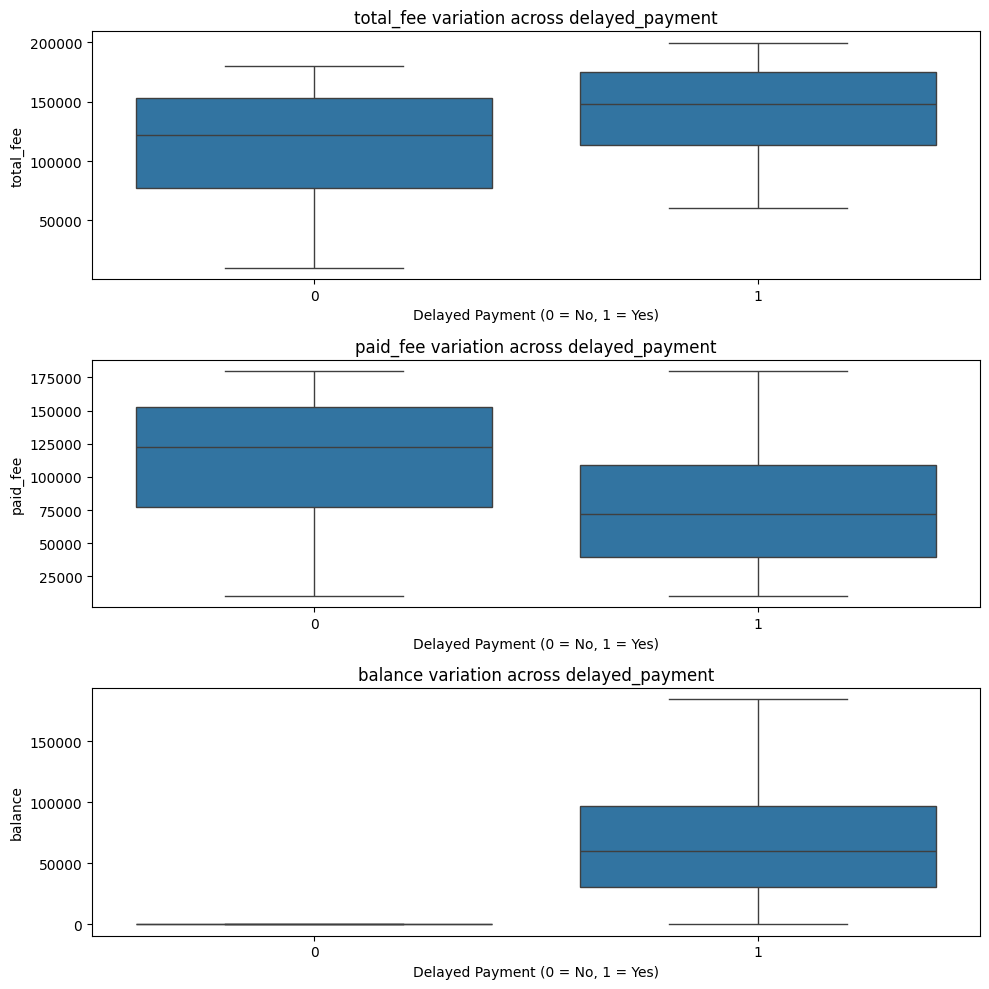

In [15]:
#Boxplot using total_fee, paid_fee, balance
# A box plot is used to understand the distribution of numerical data and to detect outliers.
num_cols = ['total_fee', 'paid_fee', 'balance']

plt.figure(figsize=(10,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x='delayed_payment', y=col, data=merged)
    plt.title(f"{col} variation across delayed_payment")
    plt.xlabel("Delayed Payment (0 = No, 1 = Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


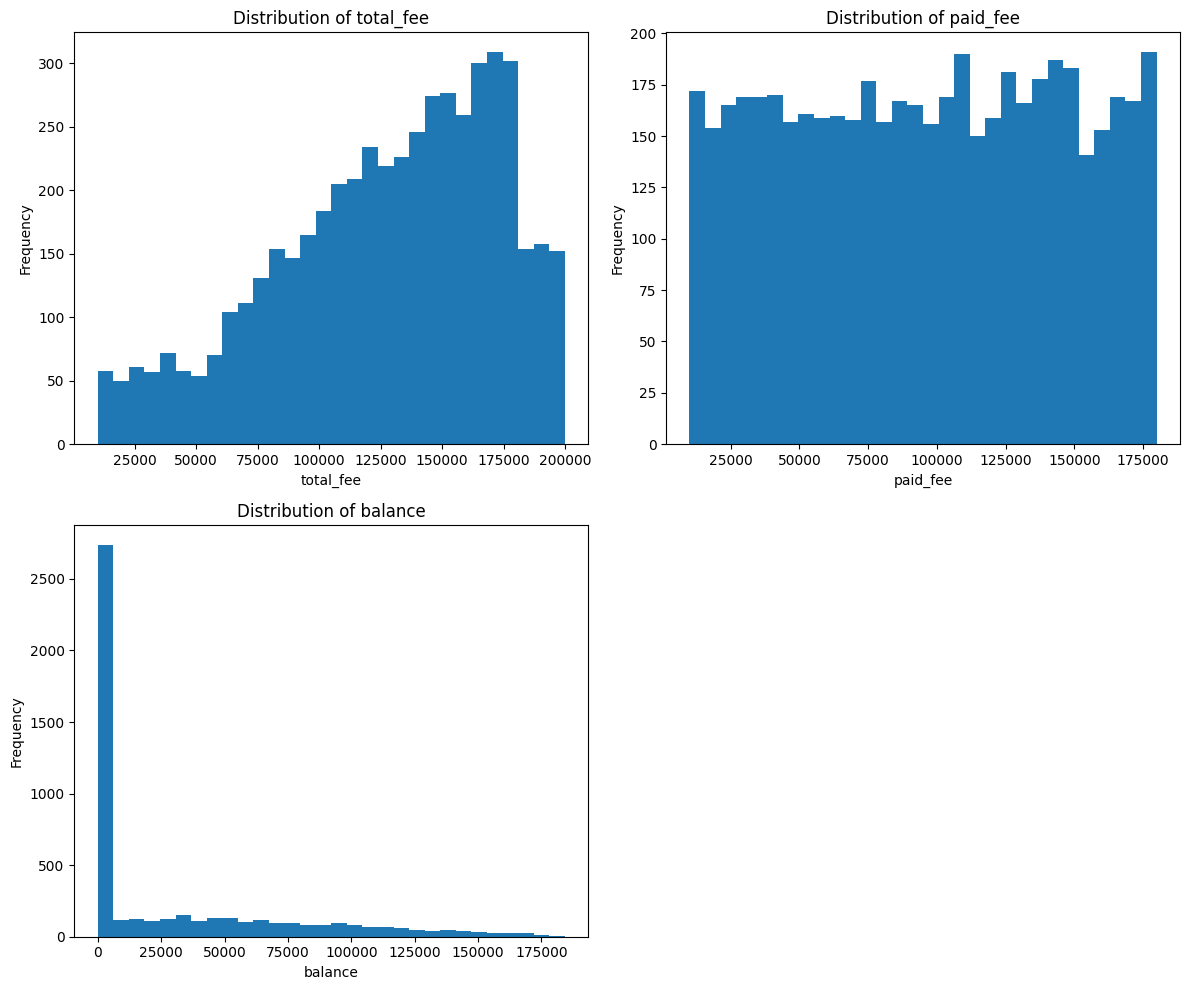

In [16]:
# Data Distribution
num_cols = ['total_fee', 'paid_fee', 'balance']
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)   # 2 rows, 2 columns layout
    plt.hist(merged[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [17]:
merged = merged.drop(columns=['phone_y','phone_x'])

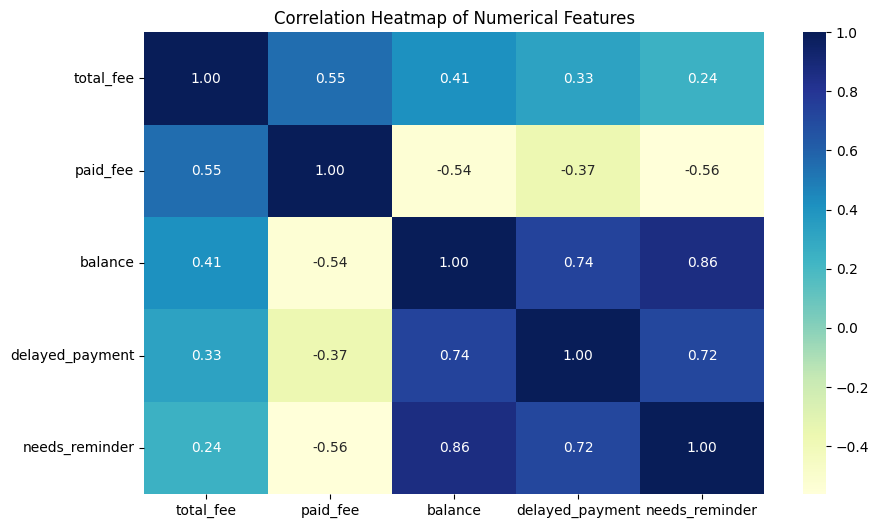

In [21]:
# Correlation Heatmap
# A heatmap is used to visualize correlations between numerical features
corr = merged.corr(numeric_only=True)


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
merged.to_csv('../data/merged.csv',index=True)
print('successesful')

successesful


### Key Insights from EDA

- Balance amount is the strongest predictor of delayed payment  
- Students paying less than 70% of total fee often require reminders  
- Course type influences fee payment behavior  
- Admission status directly impacts fee-related patterns  

### Conclusion

EDA provided valuable insights into student fee behavior and guided feature engineering and model selection in subsequent stages.
